<h2>Import bibliotek</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h2>Zadanie 1.</h2>

<h4>Funkcja obliczająca średnią geometryczną</h4>

In [2]:
# calculate the geometric average of distance to other points for given xs
def geom_avgs(xs):
    distances = abs(xs[:,np.newaxis] - xs)
    # assign 1 to distances of points from each other to leave product unaffected
    distances[distances == 0] = 1
    return np.prod(distances, axis=0) ** (1/(len(xs)-1))

<h4>Funkcje definiujące zbiory punktów</h4>

In [3]:
# calculate Chebyshev nodes from interval [-1;1]
def chebyshev_node(i, n):
    return -np.cos(np.pi * i / n)

# calculate uniformly distributed points form interval [-1;1]
def uniform_node(i, n):
    return -1 + 2*i/n

<h4>Definicja zbiorów punktów</h4>

In [4]:
# used n values
ns = [10, 20, 50]
# chebyshev nodes sets
chebyshev_nodes_sets = [chebyshev_node(np.array(range(n+1)),n) for n in ns]
# legendre nodes sets
legendre_nodes_sets = [np.polynomial.legendre.leggauss(n+1)[0] for n in ns]
# uniform nodes sets
uniform_nodes_sets = [uniform_node(np.array(range(n+1)),n) for n in ns]

<h4>Narysowanie wykresów</h4>

Funkcja rysująca wykresy

In [5]:
# plot function
def plot_nodes_sets(nodes_sets, plot_label):
    # add plots
    for nodes_set in nodes_sets:
        plt.plot(
            nodes_set,
            geom_avgs(nodes_set),
            label=f"{plot_label} - n={len(nodes_set)-1}",
            linestyle='',
            marker='o'
        )
    # add labels
    plt.xlabel(f"{plot_label} nodes")
    plt.ylabel("geometric avg of distances between nodes")
    # show with legend
    plt.legend()
    plt.show()

Wykres dla punktów Czebyszewa

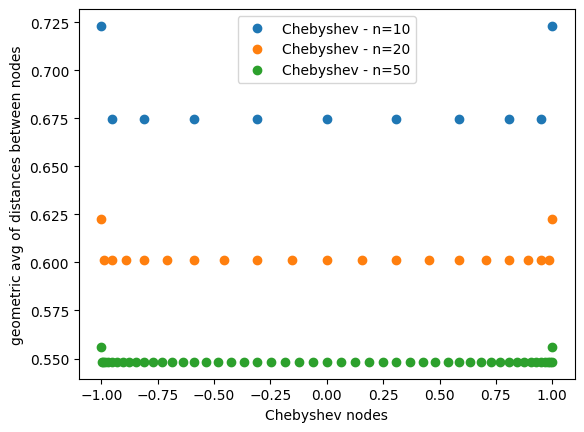

In [6]:
plot_nodes_sets(chebyshev_nodes_sets, "Chebyshev")

Wykres dla punktów Legendre'a

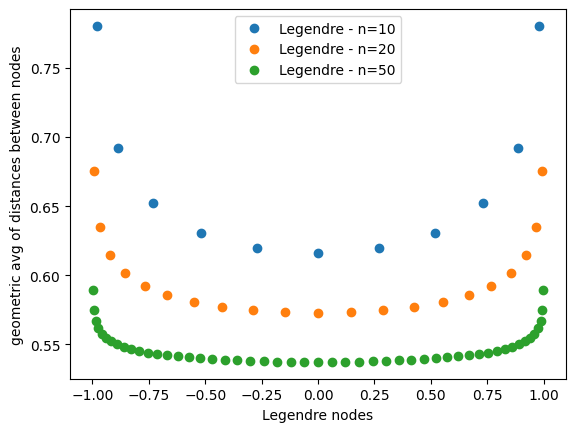

In [7]:
plot_nodes_sets(legendre_nodes_sets, "Legendre")

Wykres dla punktów rozmieszczonych równomiernie

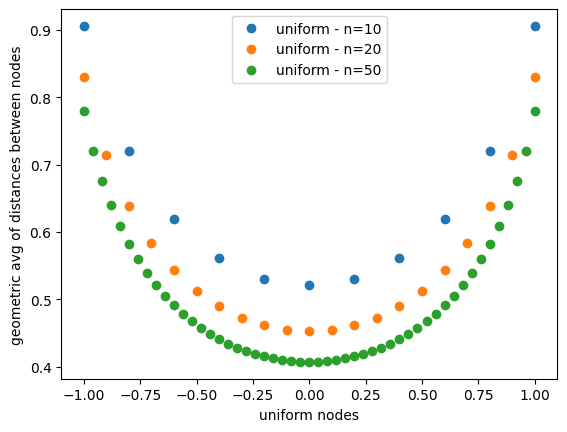

In [8]:
plot_nodes_sets(uniform_nodes_sets, "uniform")